<a href="https://colab.research.google.com/github/6k5wyi/DataScience-With-Crawlering/blob/main/%EC%9A%B0%EB%A6%AC%EB%82%98%EB%9D%BC%EA%B4%80%EA%B4%91%EA%B0%9D_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 우리나라를 방문하는 관광객 시각화

## Colab에서 matplotlib 실행시 한글 안나오는 문제 해결 방법
다음을 실행시킨뒤, 런타임 -> 런타임 다시시작 누르기

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.size'] = 12
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


다음을 실행하여 테스트 해보기

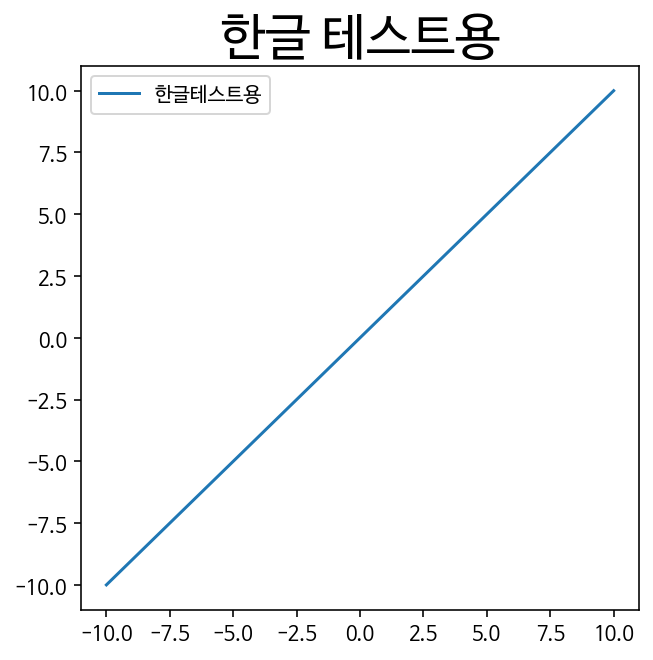

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([-10,10], [-10,10], label='한글테스트용')
plt.title("한글 테스트용", size = 25)
plt.legend()
plt.show()

## 1. 데이터 수집
https://kto.visitkorea.or.kr/kor/notice/data/statis/tstat/profit/notice/inout/popup.kto

https://drive.google.com/uc?export=download&id=1KooZH-tAMCf1zEK3JB0S7_qtb1Ti8_n9

In [ ]:
import pandas as pd 
data = 'https://drive.google.com/uc?export=download&id=1KooZH-tAMCf1zEK3JB0S7_qtb1Ti8_n9'
df = pd.read_excel(data)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


## 2. 시각화 라이브러리 가져오기

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 중국 국적의 데이터 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


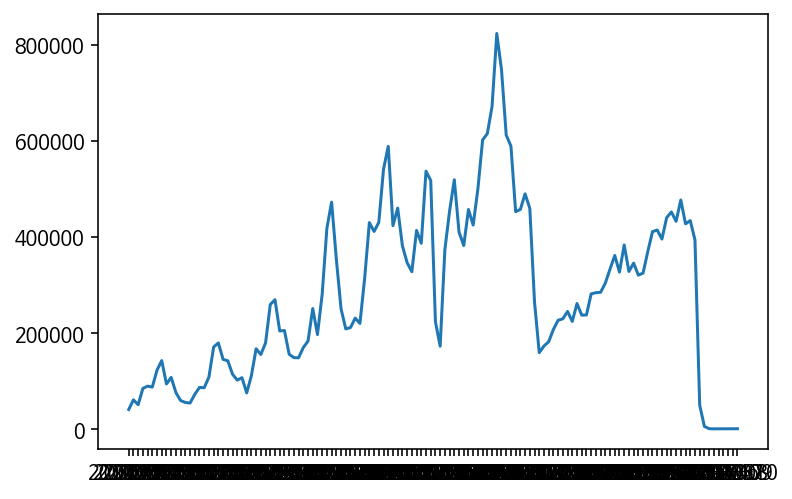

In [ ]:
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.show()

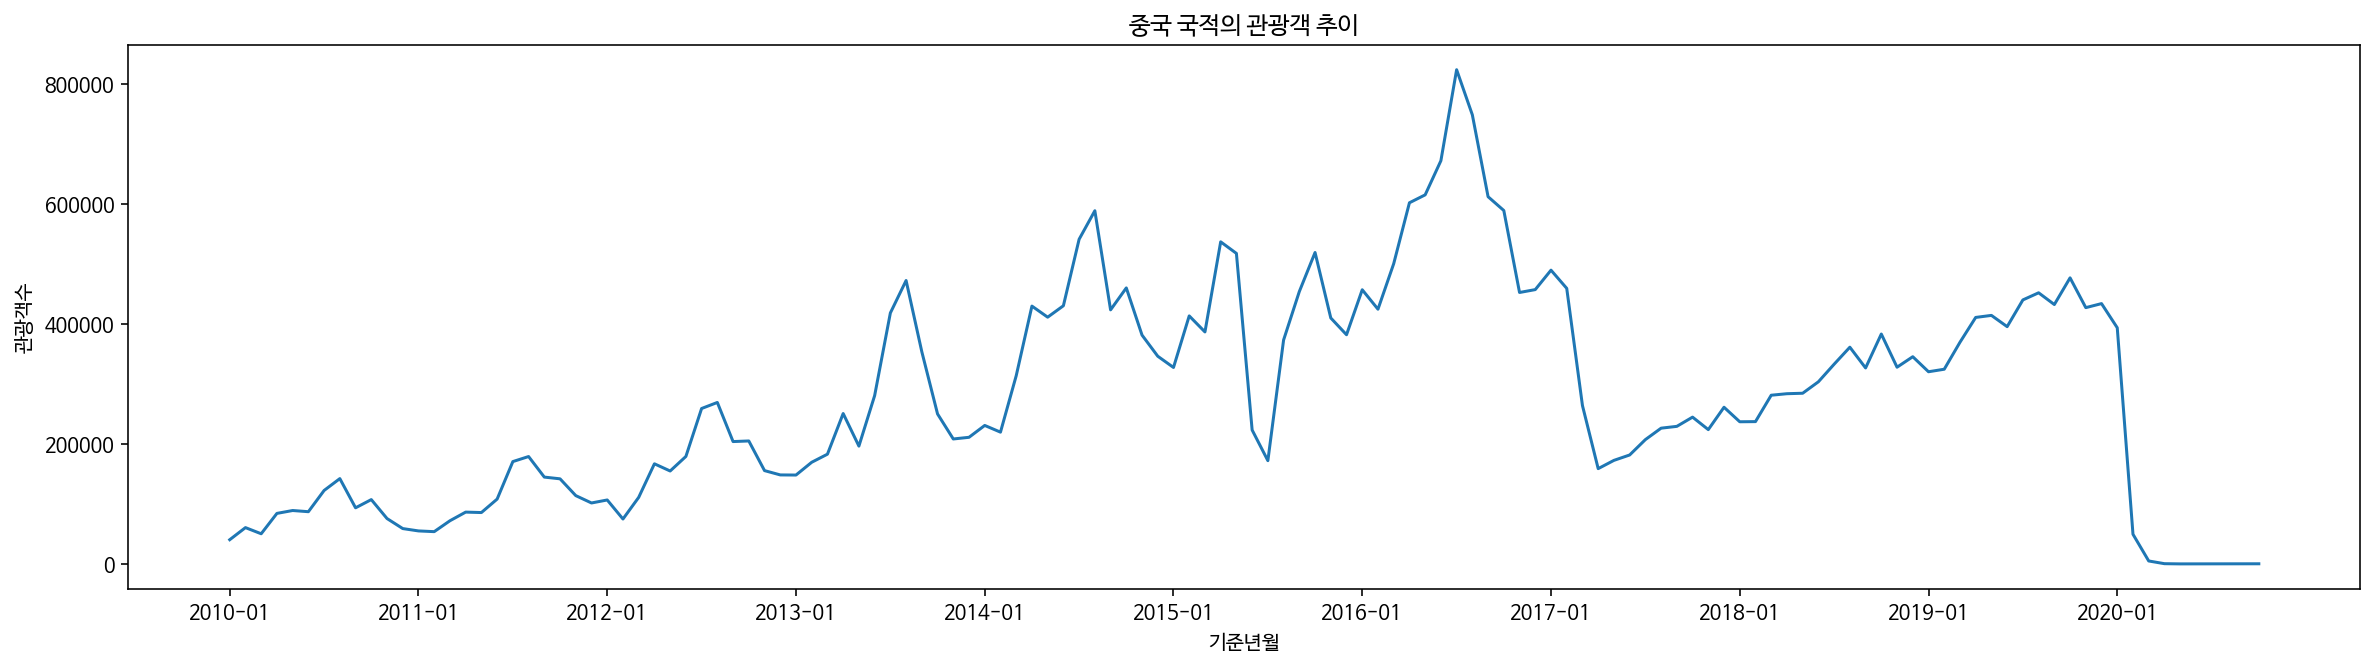

In [ ]:
## 그래프 크기 조절 
plt.figure(figsize = (20, 5))

## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

## 그래프 표현하기 
plt.show()

In [ ]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국가의 리스트 만들기
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']
cntry_list

['중국', '일본', '대만', '미국', '홍콩']

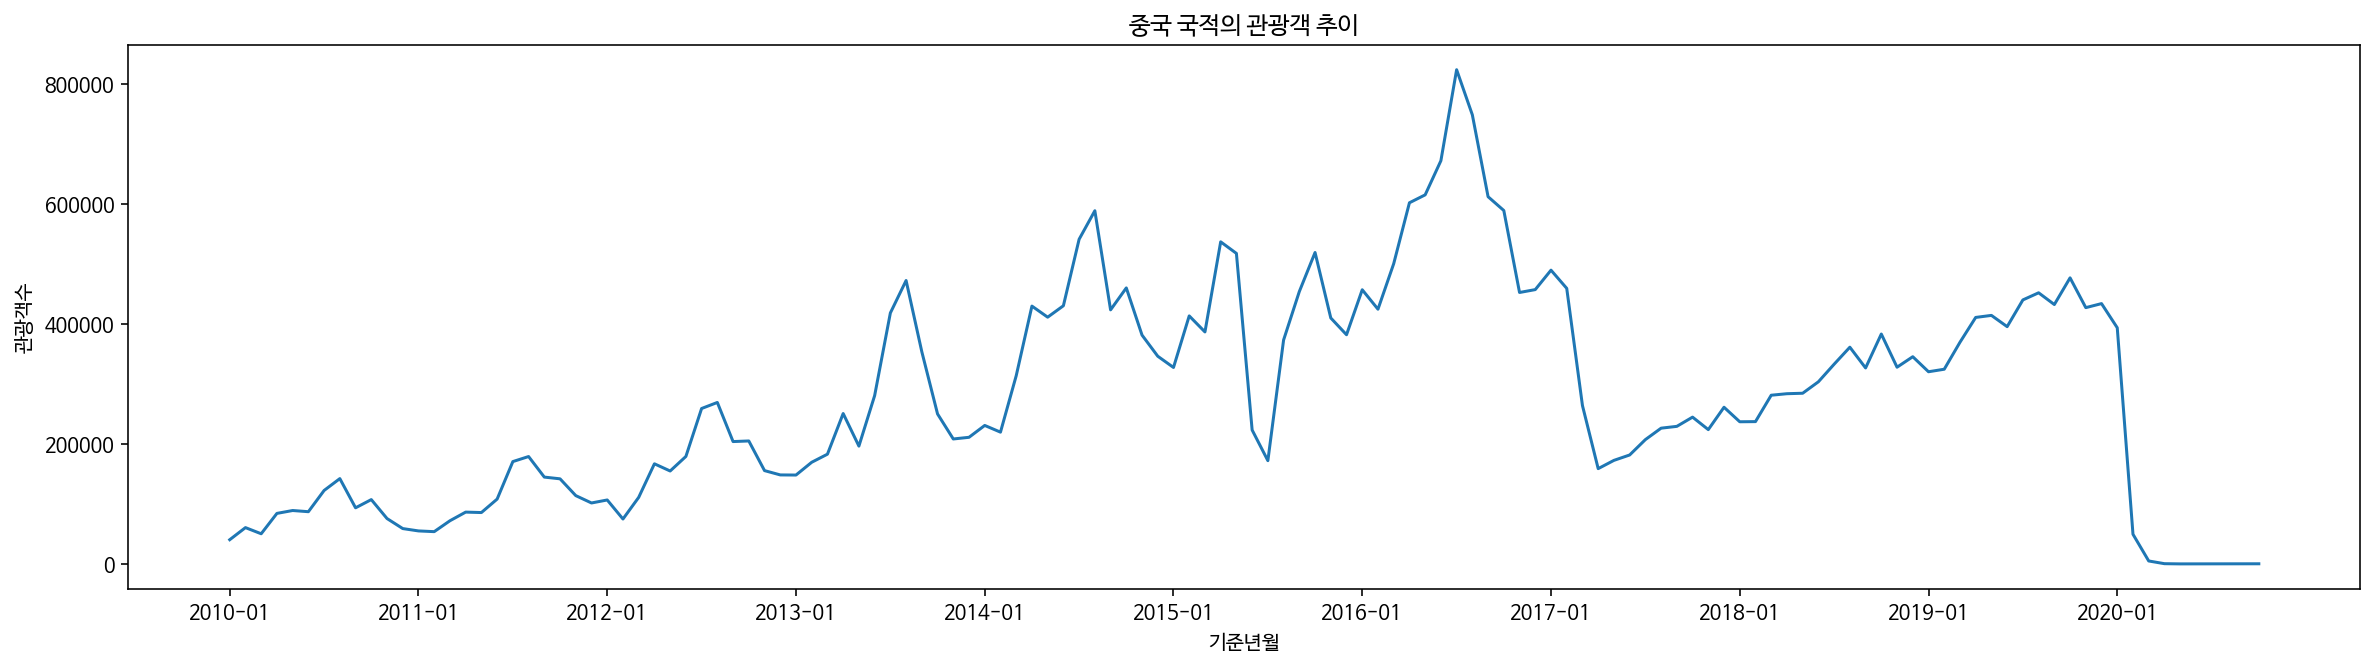

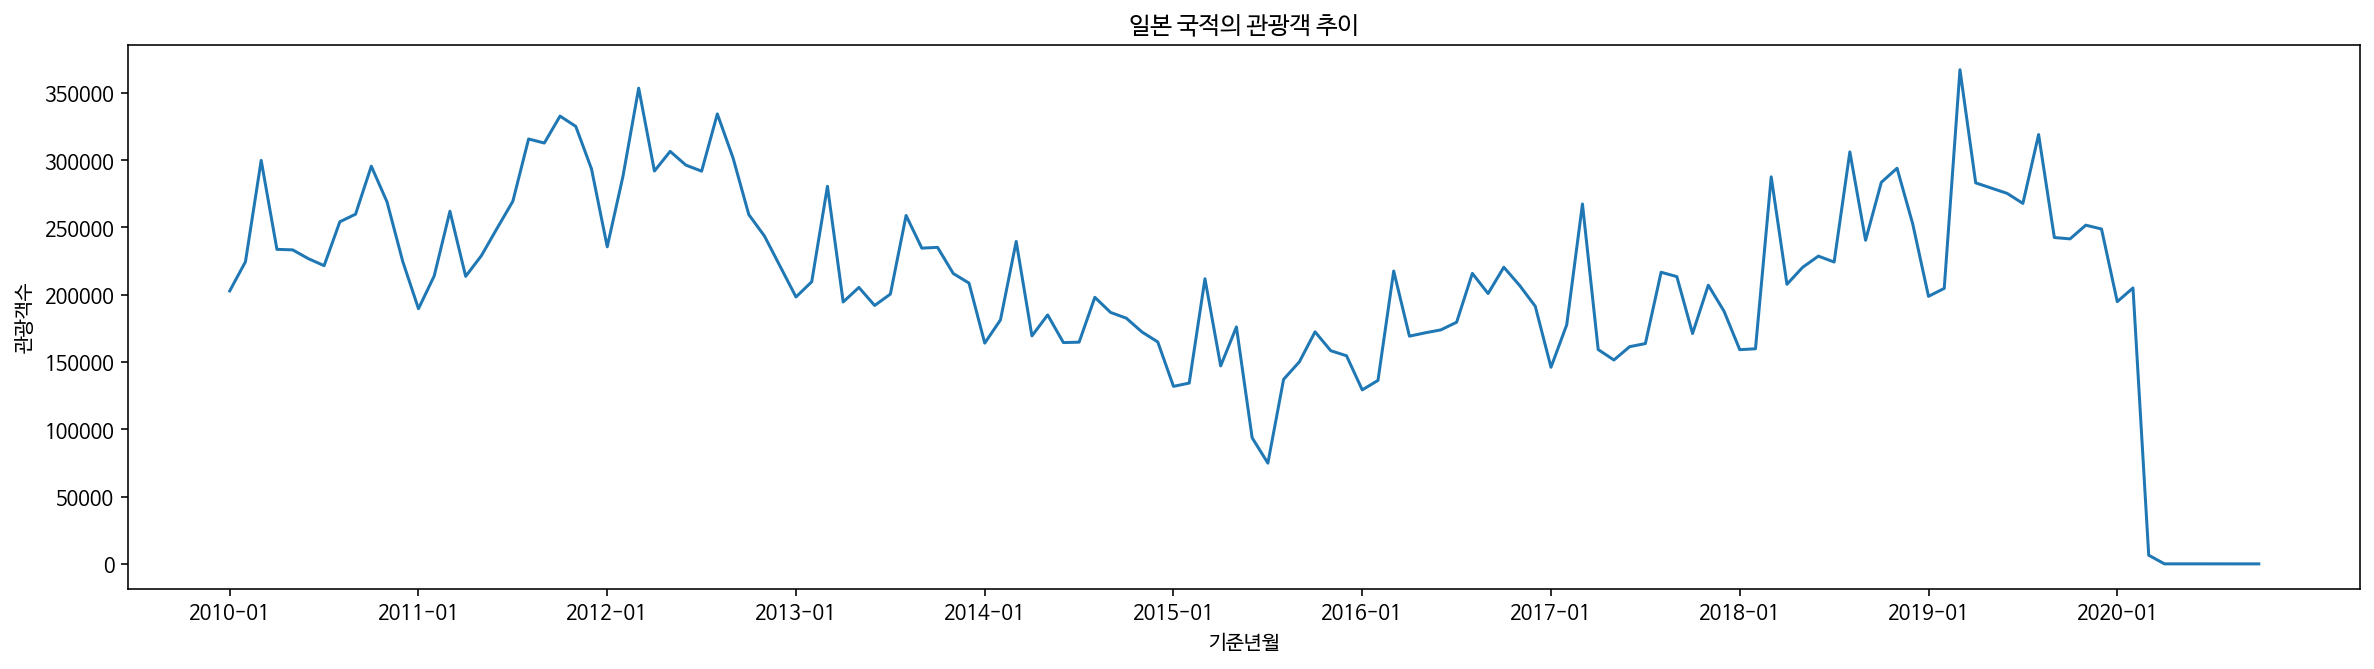

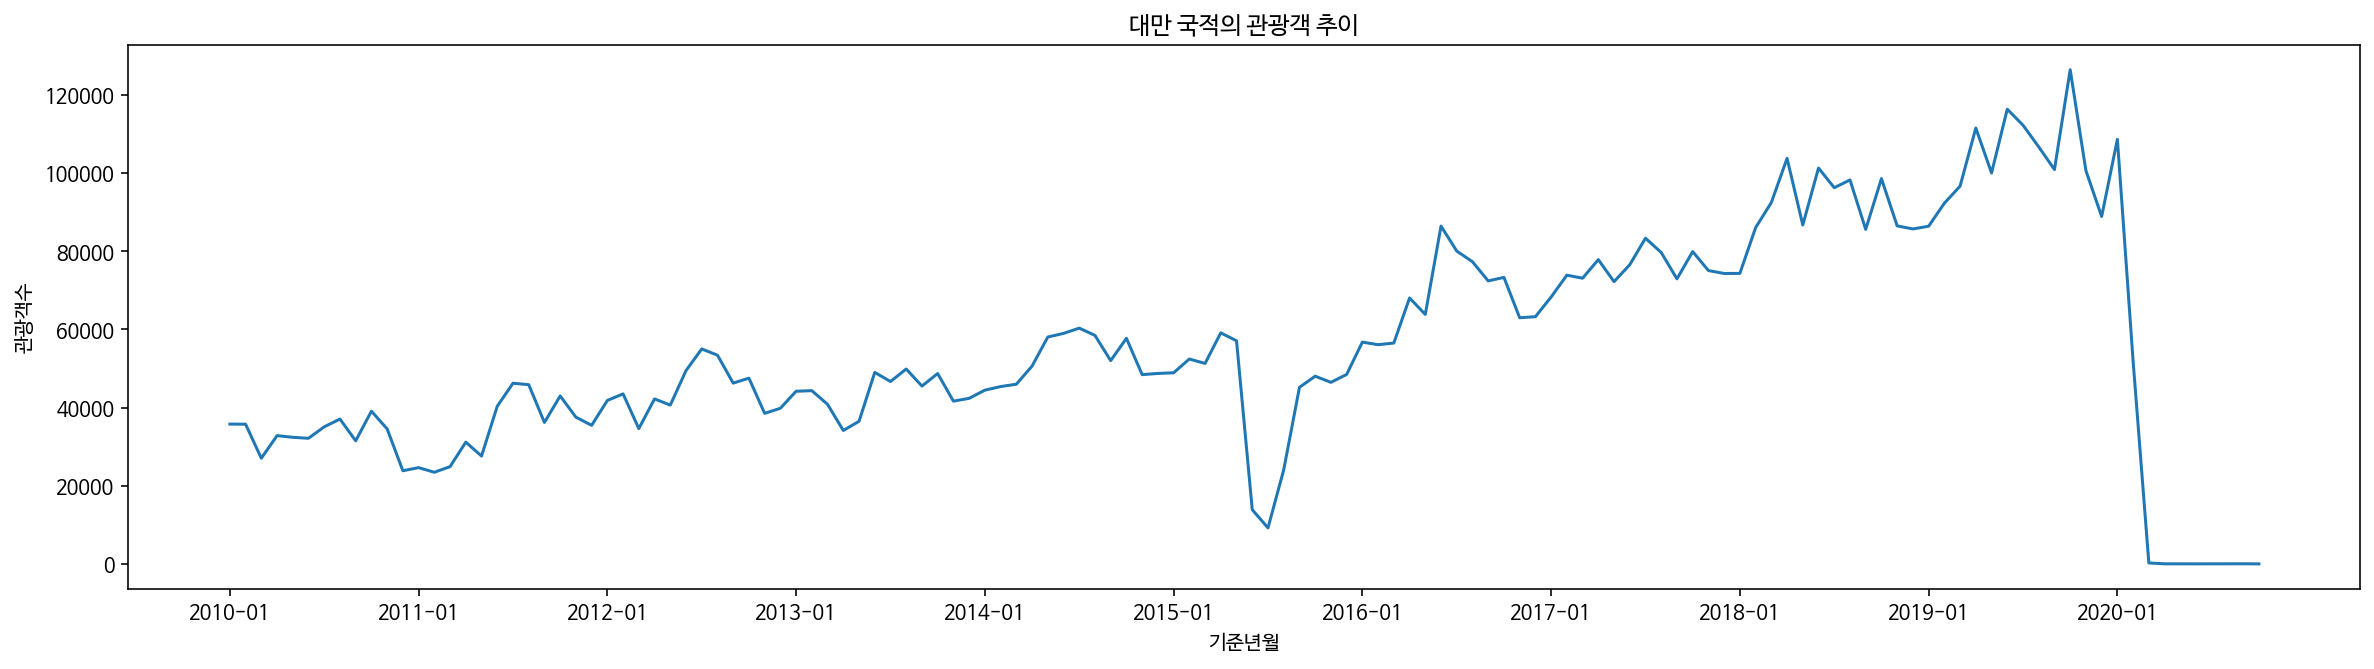

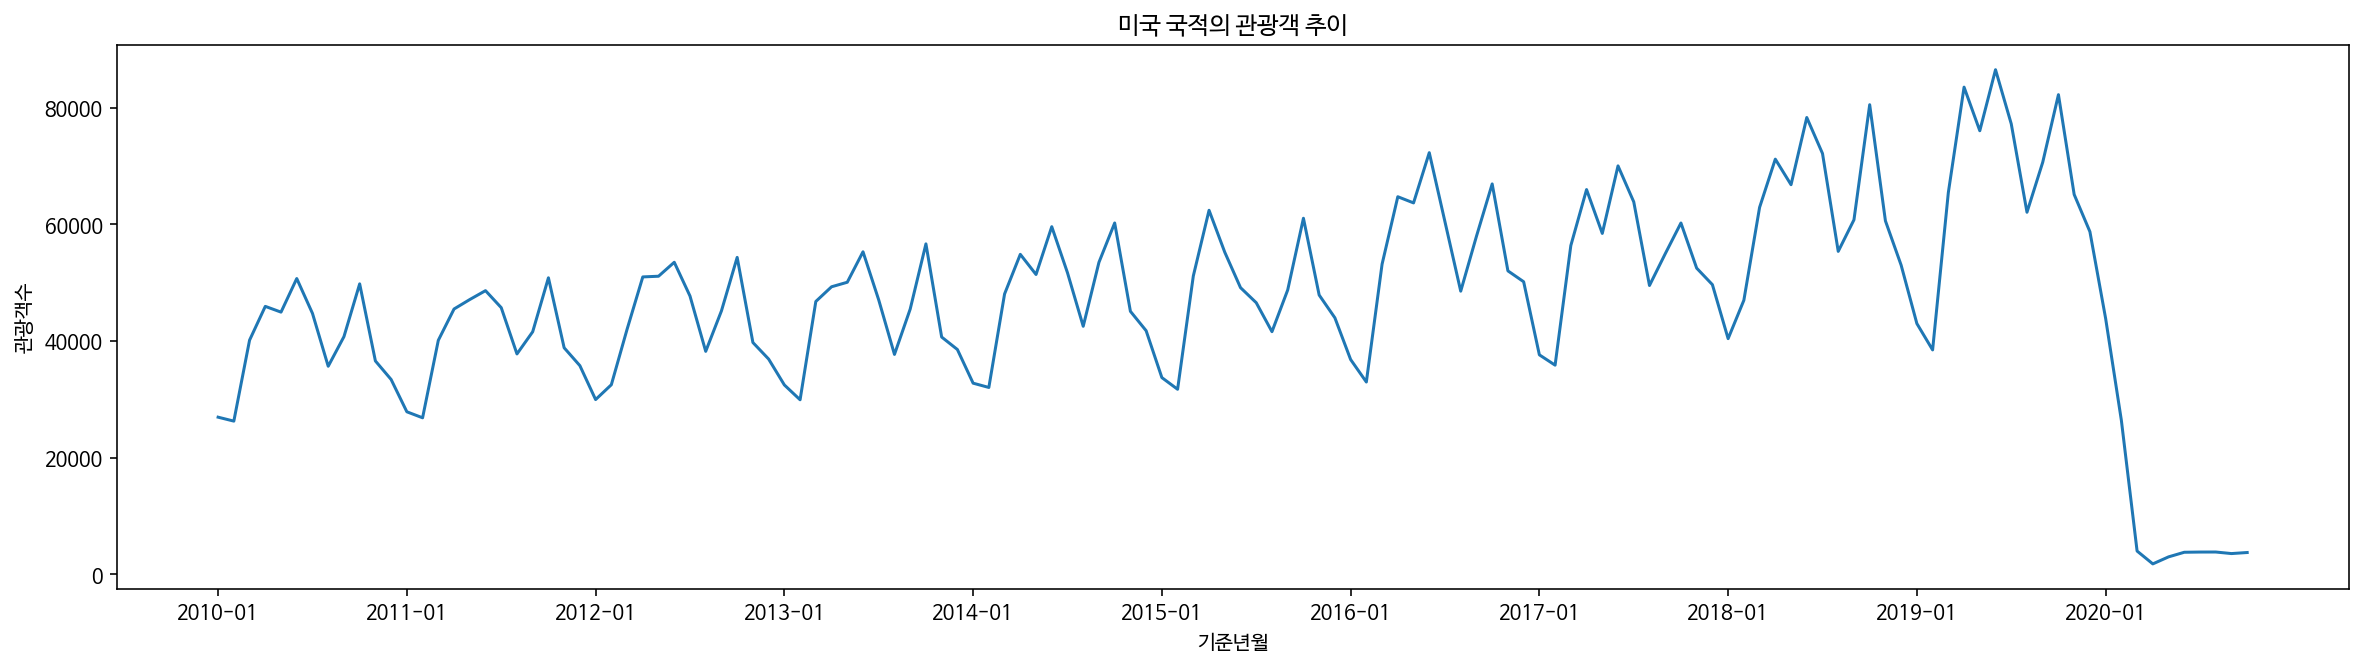

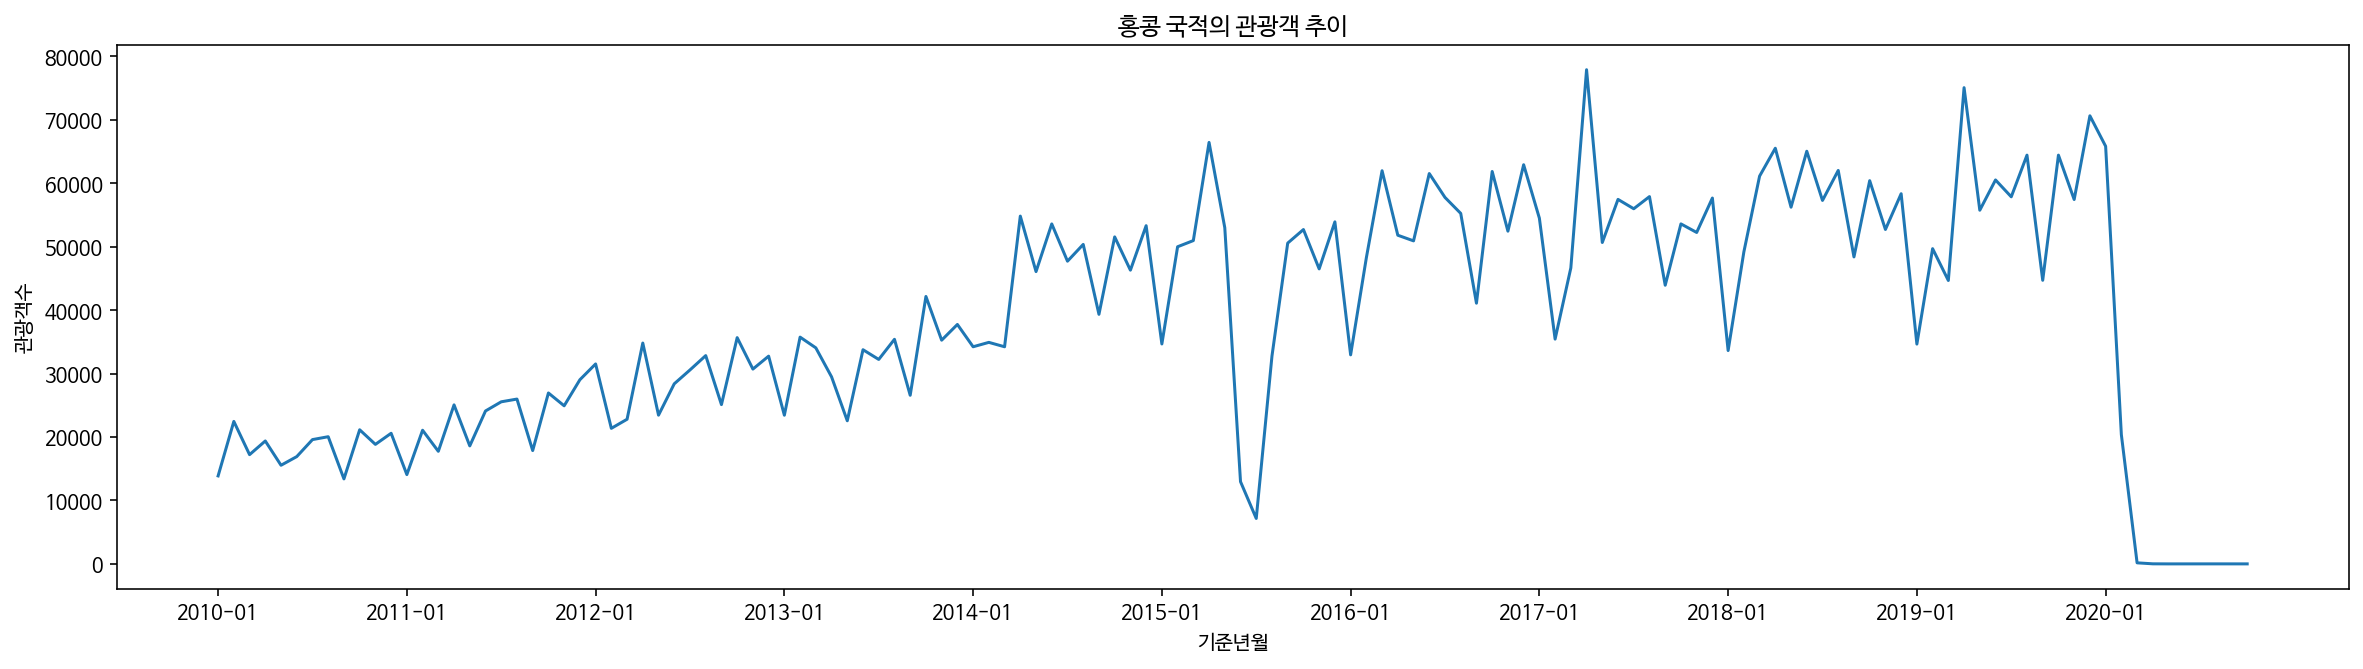

In [ ]:
# 반복문으로 여러 그래프 그리기 
for cntry in cntry_list: 
    # 국적 관광객만 추출 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (20, 5))
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

    ## 그래프 표현하기 
    plt.show()

## 4. 히트맵 그리기
히트맵 그래프는 matrix 형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법으로, 전체 데이터를 한눈에 파악할 수 있다.

In [ ]:
#df 데이터 알아보기
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [ ]:
# str.slice() 함수를 이용해 연도, 월 컬럼 만들기 
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [ ]:
# 중국인 관광객 필터링
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [ ]:
# pivot_table() 함수 이용하여 관광객 분리하기
df_pivot = df_filter.pivot_table(values = '관광'
                         , index = '년도'
                         , columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [ ]:
# 히트맵 그래프 그리기에 필요한 라이브러리 import 
import matplotlib.pyplot as plt 
import seaborn as sns 

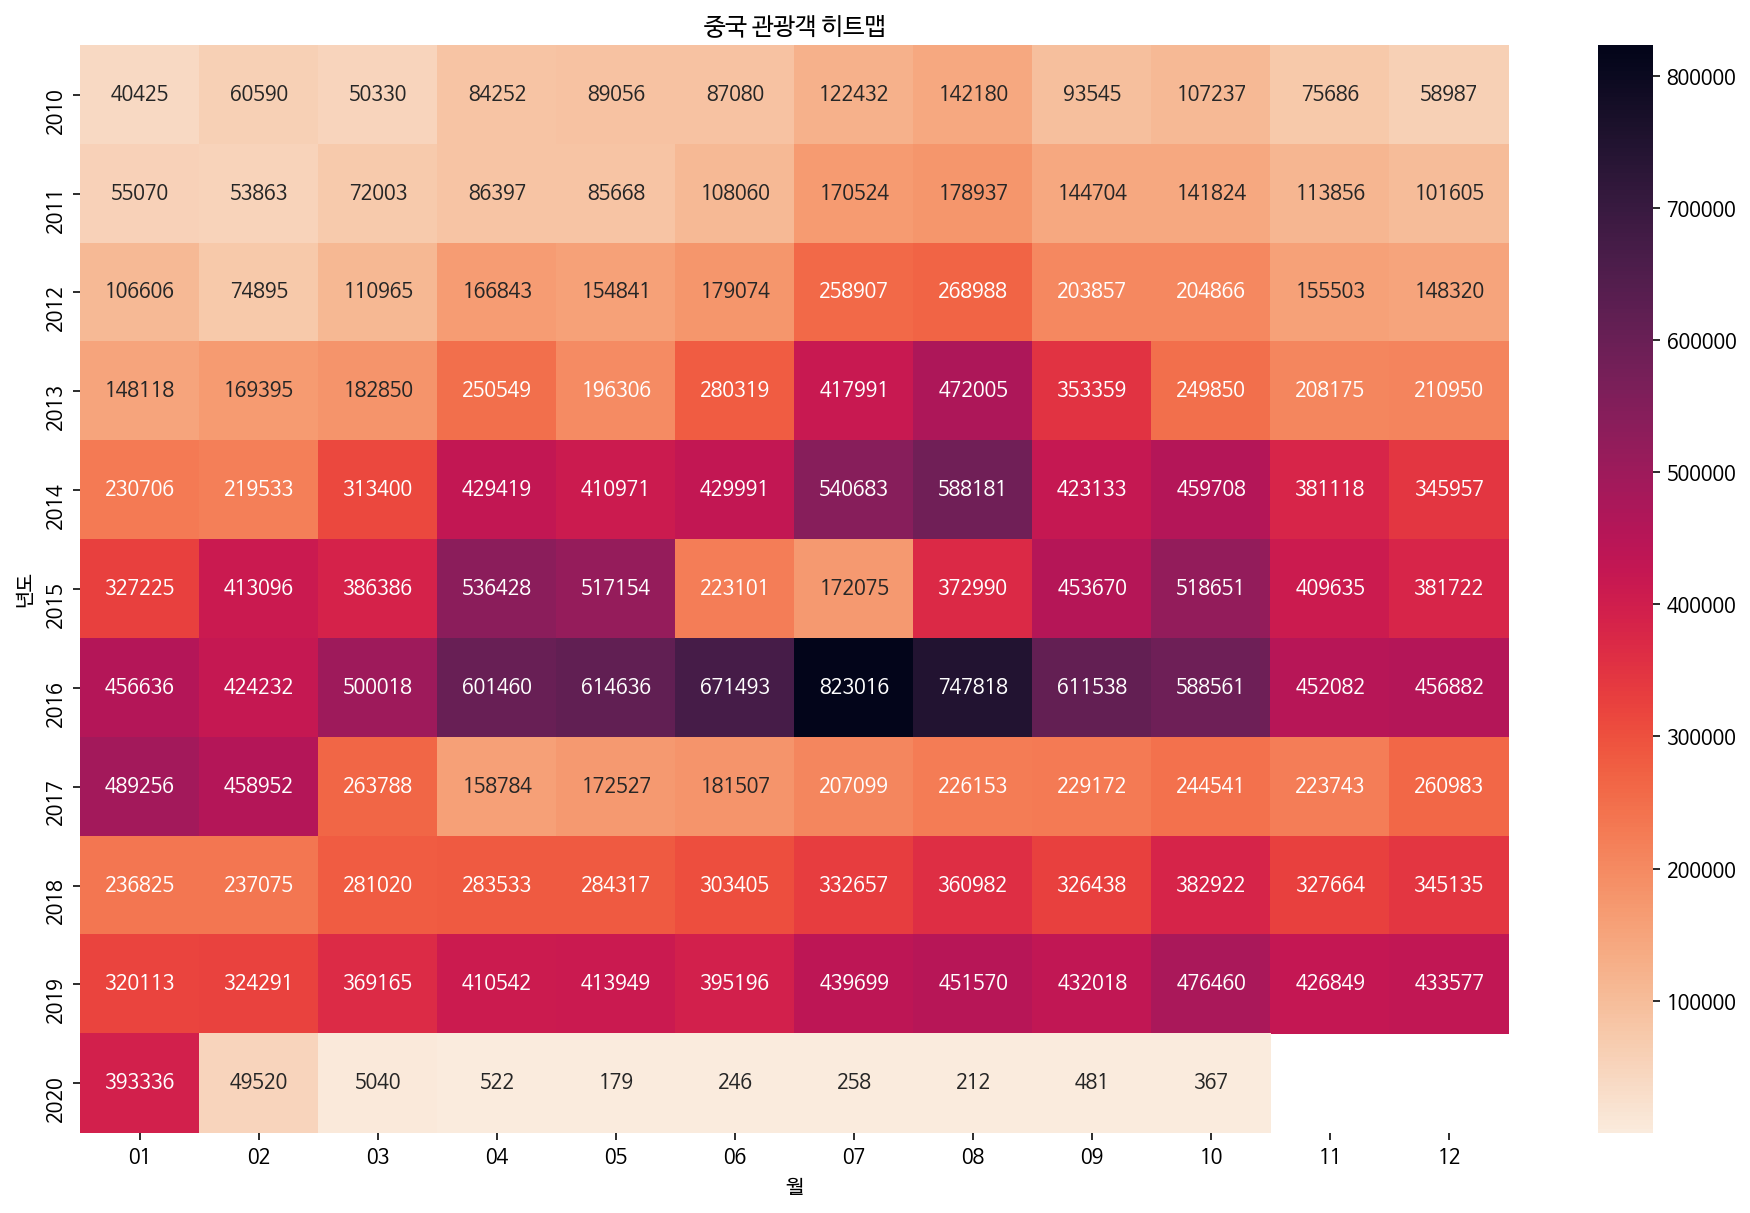

In [ ]:
# 그래프 그리기
## 그래프 크기 설정 
plt.figure(figsize = (16, 10))

## 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

## 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

## 그래프 표현 
plt.show()

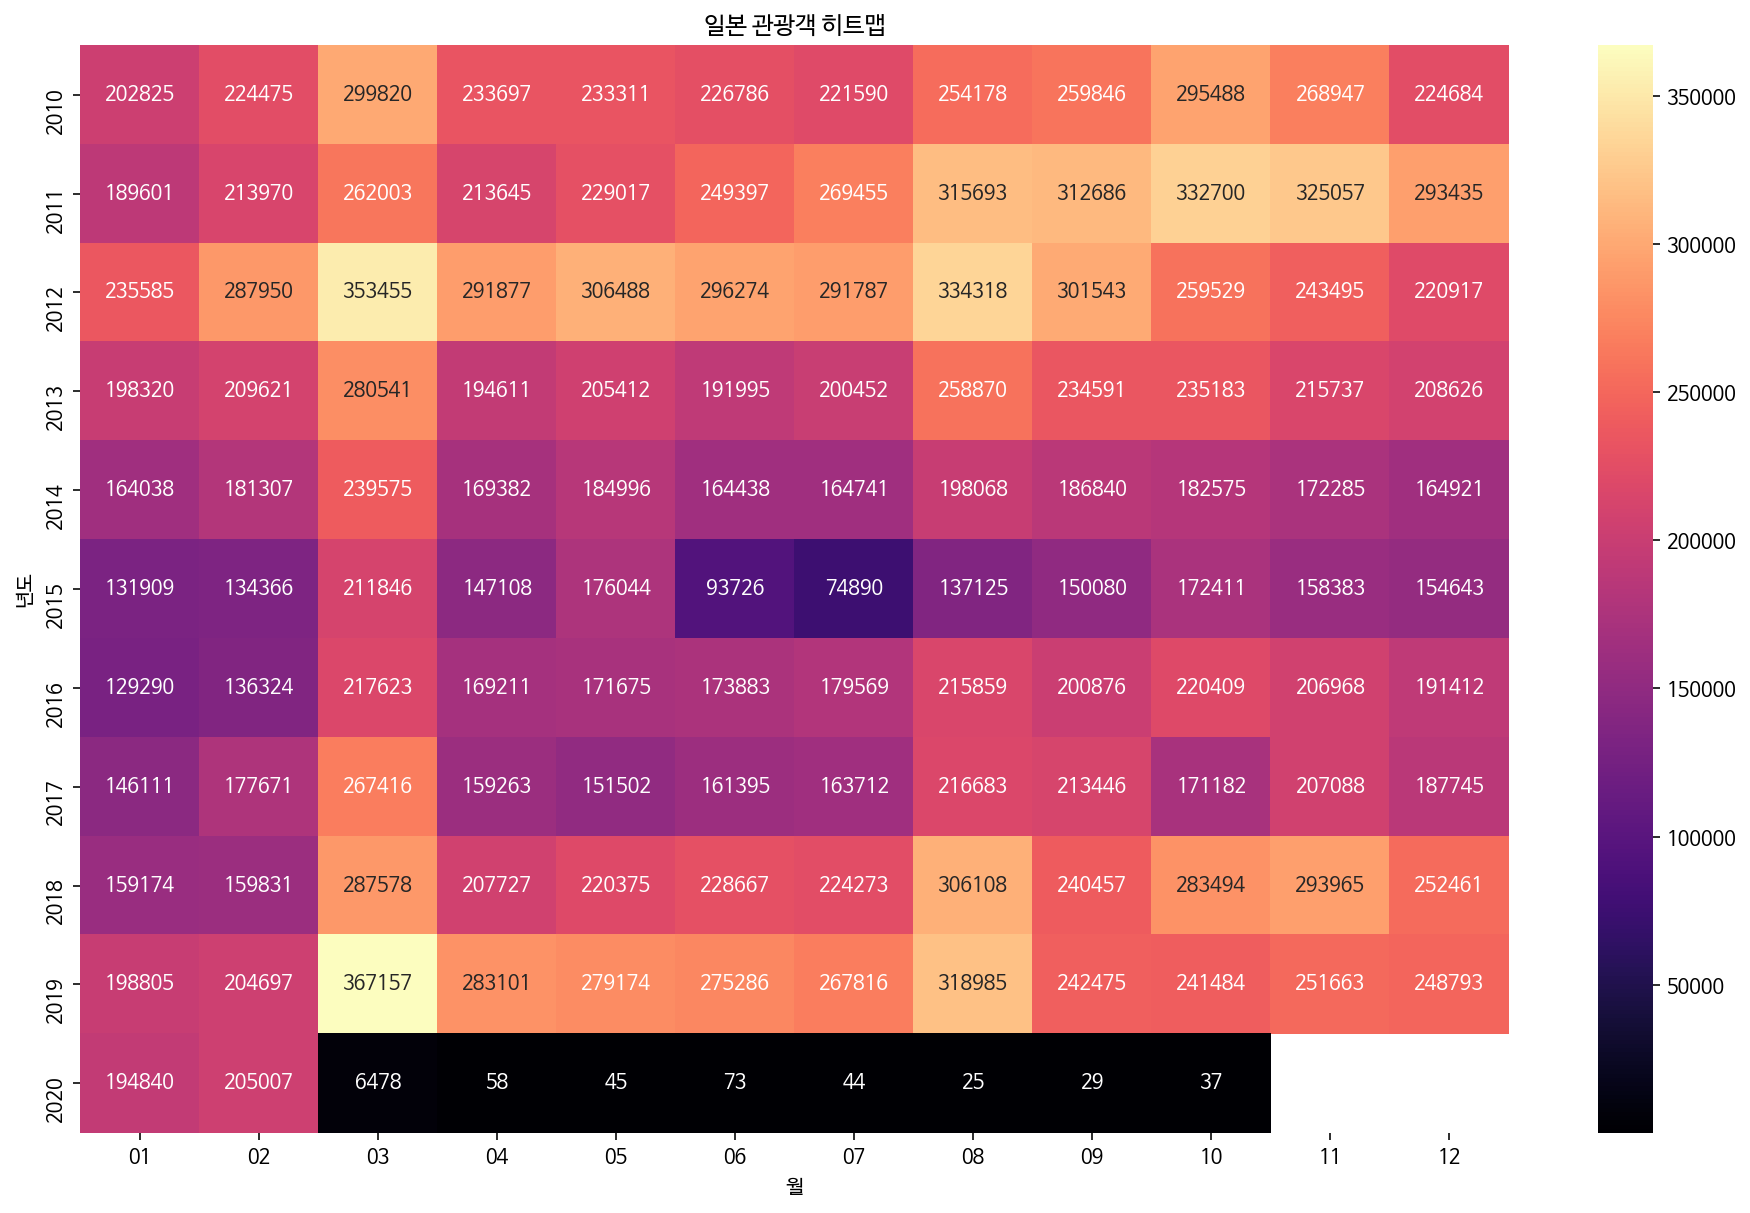

In [ ]:
# 일본 관광객 히트맵 표현하기
## 필터링
condition = (df['국적'] == '일본')
df_filter = df[condition]
# 피봇 테이블 만들기
df_pivot = df_filter.pivot_table(values = '관광'
                         , index = '년도'
                         , columns = '월')
## 그래프 크기 설정 
plt.figure(figsize = (16, 10))

## 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'magma')

## 그래프 타이틀 달기 
plt.title('일본 관광객 히트맵')

## 그래프 표현 
plt.show()

## 과제
대만, 미국, 홍콩 관광객의 히트맵을 그리시오.

## 자율탐구 주제
우리나라를 방문하는 외국인 관광객의 대부분을 차지하는 중국인 관광객의 시각화 결과를 보면서 

계절적인 패턴이 존재하는지(Seasonality), 추세(Trend)
가 어떤지, 큰 변화가 있었는지(Event)를 살펴보고 

변화의 원인이 무엇인지 생각해 보자

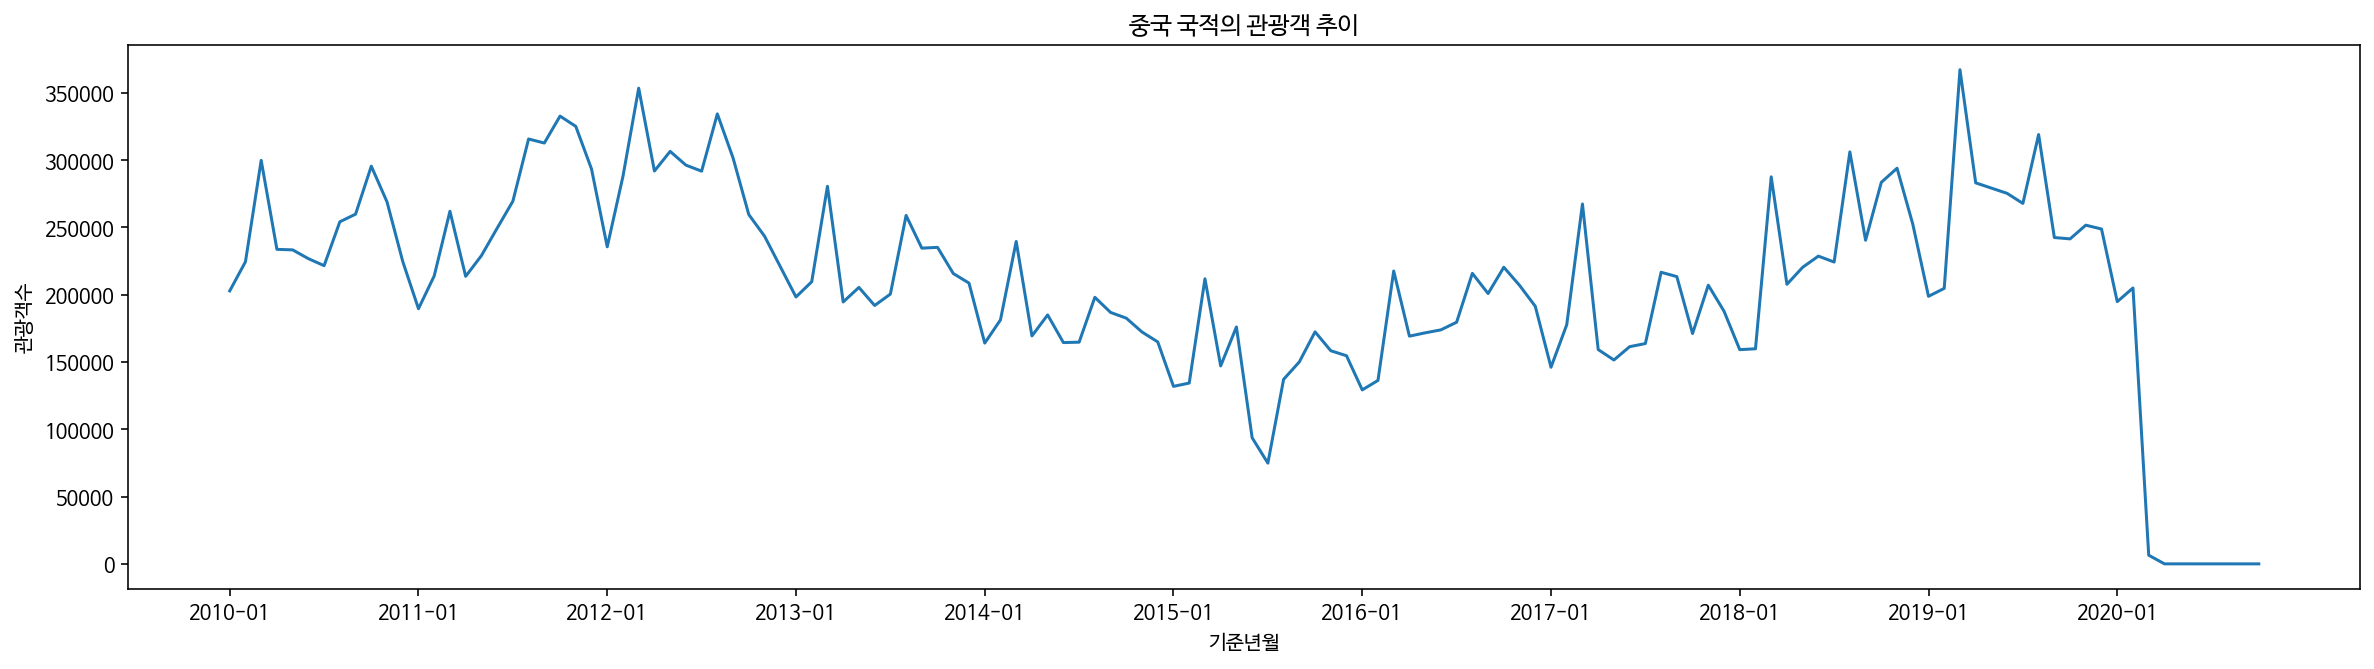

In [ ]:
## 그래프 크기 조절 
plt.figure(figsize = (20, 5))

## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

## 그래프 표현하기 
plt.show()

위의 그래프의 특징은 다음과 같다.

1. (Trend) 2010년 부터 2016년까지 관광객 수가 꾸준히 증가하는 추세
2. (Event) 2017년 초에 관광객 수가 큰 폭으로 감소
3. (Trend) 2017년 중순부터 관광객 수가 완만히 증가하는 추세
4. (Seasonality) 매년 여름에는 관광객 수가 최대값을 가짐
5. (Event) 단, 2015년 여름에는 관광객 수가 큰 폭으로 감소
6. (Event) 2020년 초에 관광객 수가 0에 가까워질 만큼 급격히 감소